In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

695.3335714383279


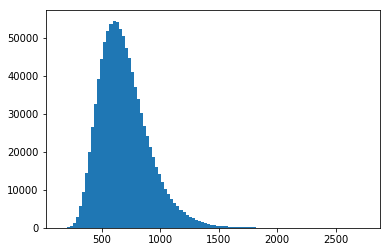

In [2]:
# calibration: unit for money is hundred per year, 2018 Chinese data is collected, suppose wage dist is log normal

interest_rate=0.0435  #the 1-year interest rate in 2018 is 4.35%
beta=1/(1+interest_rate)
c=int(107.31)  # rural disposable income is 10731 in 2018,assuming total income is 10731
urban_disposable_income=int(679.90)  #in 2018, in BJ, urban disposable income is 67990
w_min,w_max=int(254.40),1500  #in 2018, minimun wage in BJ was 2120 per month so w_min is 254.4 (21.2*12) but minimun wage is not disposable income
w_num=w_max-w_min+1  

tol=10e-4
w_vec=np.linspace(w_min,w_max,w_num)
ctr=0

#obtain the empirical log normal distribution
dist_mean,dist_num=np.round(np.log(urban_disposable_income),1),1000000
dist_std=np.round((dist_mean-np.log(w_min))/3,1) # suppose the lower bound is w_min, based on 3 sigma rule, need further investigation

#obtain the empirical log normal distribution
dist=np.random.lognormal(dist_mean,dist_std,dist_num)

print(np.mean(dist))

plt.hist(dist,bins=100)
plt.show()

the sum of pdf is 1.00


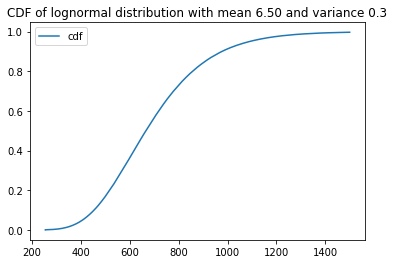

In [3]:
w_pdf=np.zeros(w_num)

w_pdf[0]=np.sum(w_vec[0]>=dist)  #lognormal 是正无穷的，然而wage有下限，因此把下限的pdf设为小于下限的概率之和
for ii in range(1,w_num-1):
    w_pdf[ii]=np.sum(np.logical_and(w_vec[ii-1]<dist,dist<=w_vec[ii]))
    
w_pdf[-1]=np.sum(w_vec[-2]<dist)  #lognormal 是正无穷的，然而wage有上限，因此把上限的pdf设为 大于上限的概率之和

w_pdf=w_pdf/dist_num
print('the sum of pdf is %.2f'%np.sum(w_pdf))  #to check whether pdf sum up to one

w_cdf=[sum(w_pdf[:ii]) for ii in range(w_num)]

#plt.plot(w_vec,w_pdf,label='pdf')
plt.plot(w_vec,w_cdf,label='cdf')
plt.title('CDF of lognormal distribution with mean %.2f and variance %.1f'%(dist_mean,dist_std))
plt.legend()
plt.show()

In [4]:
def job_search(T=0,fee=300,subsidy=0,tax=0):
    tuition=fee*T  #assuming tuition per year is 30 thousand

    v_new=np.zeros(w_num)
    v_old=np.ones(w_num)

    while np.max(np.abs(v_new-v_old))>tol:
        v_old=np.copy(v_new)
        v_expected=np.sum(v_old*w_pdf)
        for w_i in range(w_num):
            v_new[w_i]=max(w_vec[w_i]*beta**T/(1-beta)-tuition+subsidy,c+beta*v_expected-tax)

    index=sum(v_new<=v_new[0])
    accept_rate=sum(dist>=w_vec[index])/dist_num
    
    fiscal_balance=(1-accept_rate)*100*tax-accept_rate*100*subsidy  # 100 is for computational sake
    
    return accept_rate,fiscal_balance

In [5]:
job_search(T=0)

(0.19773, 0.0)

In [6]:
job_search(T=2,subsidy=110,tax=27)

(0.19773, -8.90099999999984)

In [10]:
job_search(T=4,subsidy=232,tax=57.2)

(0.19773, 1.6484000000000378)

In [16]:
job_search(T=6,subsidy=340,tax=83.8)

(0.19773, 0.2026000000005297)